# Plying with Pandas

Inspiration and some of the parts came from: Python Data Science [GitHub repository](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master), [MIT License](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/LICENSE-CODE) and [Introduction to Pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb) by Google, [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0)

needed packages:
 * pandas
 * numpy

support package
 * seaborn (load dataset titanic from seaborn package)
 * pivottablejs (for more easy pivot tables and fast simple visualization)
 * watermark (documenting version of packages)

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install watermark
#!pip install pivottablejs

## Intro to pandas


[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Learning Objectives:

 * Gain an introduction to the *DataFrame* and *Series* data structures of the pandas library

 * Import CSV data into a pandas *DataFrame*

 * Access and manipulate data within a *DataFrame* and *Series*

 * Export *DataFrame* to CSV

 * Reindex a *DataFrame* to shuffle data

 * operations
  * selection
  * filtering
  * melting
  * concat
  * NaNs
  * merge

 * descriptive statistics/EDA
 * corr matrix

 * Simple plotting from *DataFrame*

 * Pivot tables

# Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [ ]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.5.3'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

In [ ]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [ ]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.head()
#california_housing_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


If you need to take a peak to documentation, there is always fast way to use **?** after function. (For example if your columns are divided by ";" because marks "," decimal point as we do in Czech)

In [ ]:
pd.read_csv?

In [ ]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [ ]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [ ]:
print(type(cities[0:2]))
cities[0:2]

In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [ ]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [ ]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map),
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [ ]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [ ]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [ ]:
# Your code here

### Solution

Click below for a solution.

In [ ]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


# Working with Data

## Saving data

In [ ]:
cities.to_csv('cities_out.csv', index=False, sep=";")

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='cities_out.csv')
cities.to_csv('resultOut.zip', index=False,
          compression=compression_opts)

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row.

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [ ]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
cities.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [ ]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False


For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Creating subsets



In [ ]:
d1Area = california_housing_dataframe[['population','households','median_income']]
d2Area=d1Area;

## Filtering

codebooks etc.

In [ ]:
d1Area_mask = d1Area.population > 1000
d1Area[d1Area_mask]

,population,households,median_income
0,1015.0,472.0,1.4936
1,1129.0,463.0,1.8200
6,1841.0,633.0,2.6768
8,3134.0,1056.0,2.1782
10,2434.0,824.0,2.6797
...,...,...,...
16991,1343.0,479.0,2.4805
16993,1152.0,435.0,3.0806
16996,1194.0,465.0,2.5179
16997,1244.0,456.0,3.0313


Alternatives

In [ ]:
d1Area_mask = d1Area['population'] > 1000
d1Area[d1Area.population > 1000]

,population,households,median_income
0,1015.0,472.0,1.4936
1,1129.0,463.0,1.8200
6,1841.0,633.0,2.6768
8,3134.0,1056.0,2.1782
10,2434.0,824.0,2.6797
...,...,...,...
16991,1343.0,479.0,2.4805
16993,1152.0,435.0,3.0806
16996,1194.0,465.0,2.5179
16997,1244.0,456.0,3.0313


## Concat

In [ ]:
data1=d1Area.sample(n=500, random_state=1)
data1['Label']='Data1'

data2=d2Area.sample(n=500, random_state=1)
data2['Label']='Data2'

resultOut = pd.concat([data1, data2])

In [ ]:
data1=data1[['Label','population','households','median_income']]
data1.head()

,Label,population,households,median_income
4752,Data1,2621.0,661.0,6.2427
13348,Data1,1043.0,351.0,6.2048
13459,Data1,619.0,231.0,4.6304
6691,Data1,634.0,261.0,1.6406
12750,Data1,3060.0,1060.0,5.3064


In [ ]:
data2=data2[['Label','population','households','median_income']]
data2.head()

,Label,population,households,median_income
4752,Data2,2621.0,661.0,6.2427
13348,Data2,1043.0,351.0,6.2048
13459,Data2,619.0,231.0,4.6304
6691,Data2,634.0,261.0,1.6406
12750,Data2,3060.0,1060.0,5.3064


## Merge

 * merge on index
 * outer
 * inner

## NaNs

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. We cannot assume what these values are, because that would distort th results. So we need to deal with these NaNs values.

We can test the missing values using `isnull()` function.

We can work with one of the `seaborn` training datasets *Penguins*

In [3]:
penguins = sns.load_dataset("penguins")

In [4]:
penguins.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


But it is more practical to test if there are any NaNs, than looking for it. We can use `.isnull().values.any()` approach.

In [5]:
penguins.isnull().values.any()

True

Or we can explore each column using `.isnull().sum()`.

In [7]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

We will want to drop all rows with unknown entries with `.dropna()` function.

In [8]:
penguins_cleaned = penguins.dropna()
penguins_cleaned.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Exploring Data

## EDA

But most of the time, you load an entire file into a `DataFrame`. And you need to explore your data. The example below `DataFrame.describe` is useful to show interesting statistics about a `DataFrame`.

In [ ]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [ ]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Or `DataFrame.tail`, which displays the last few records of a `DataFrame`:

In [ ]:
california_housing_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [ ]:
california_housing_dataframe.median_income.describe()

count    17000.000000
mean         3.883578
std          1.908157
min          0.499900
25%          2.566375
50%          3.544600
75%          4.767000
max         15.000100
Name: median_income, dtype: float64

In [ ]:
california_housing_dataframe.median_income.min()

0.4999

In [ ]:
california_housing_dataframe.median_income.max()

15.0001

In [ ]:
california_housing_dataframe.median_income.quantile(0.7)

4.4630399999999995

### Exercise
Use the `.head()`, `.tail()` and `.describe()` functions on the cleaned Penguin dataset to learn insights.

## Correletaion Matrix

In [ ]:
california_housing_dataframe.corr

<bound method DataFrame.corr of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  

## Simple Plotting

The example below is using `DataFrame.describe` to show interesting statistics about a `DataFrame`.

In [ ]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<AxesSubplot: title={'center': 'housing_median_age'}>]],
      dtype=object)

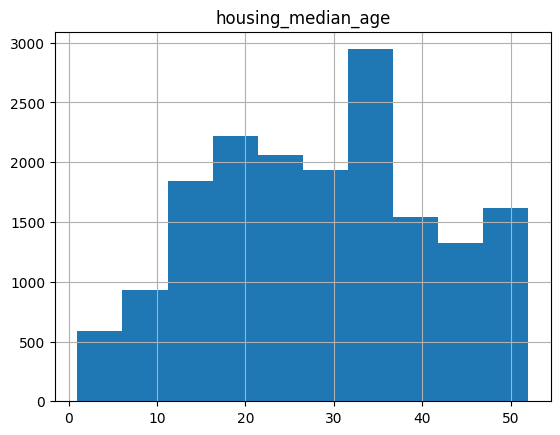

In [ ]:
california_housing_dataframe.hist('housing_median_age')

Another example, `DataFrame.plot.scatter` lets you quickly study the possition of houses:

<Axes: xlabel='longitude', ylabel='latitude'>

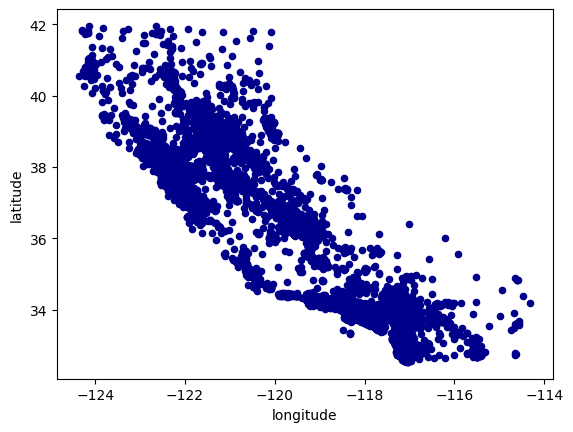

In [ ]:
california_housing_dataframe.plot.scatter(x='longitude',
                      y='latitude',
                      c='DarkBlue')

You can learn more in Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

<Axes: >

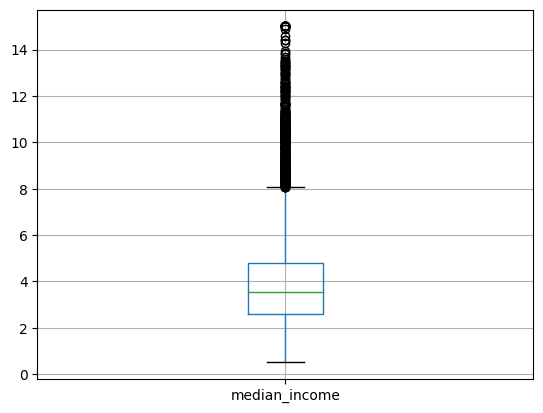

In [ ]:
california_housing_dataframe.boxplot(column=["median_income"])

## Pivot Tables

In [ ]:
import seaborn as sns

# load dataset titanic from seaborn package
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by Hand

To start learning more about this data, we might begin by grouping according to sex, survival status, or some combination thereof.
If you read the previous chapter, you might be tempted to apply a `groupby` operation—for example, let's look at survival rate by sex:

In [ ]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This gives us some initial insight: overall, three of every four females on board survived, while only one in five males survived!

This is useful, but we might like to go one step deeper and look at survival rates by both sex and, say, class.
Using the vocabulary of `groupby`, we might proceed using a process like this:
we first *group by* class and sex, then *select* survival, *apply* a mean aggregate, *combine* the resulting groups, and finally *unstack* the hierarchical index to reveal the hidden multidimensionality. In code:

In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This gives us a better idea of how both sex and class affected survival, but the code is starting to look a bit garbled.
While each step of this pipeline makes sense in light of the tools we've previously discussed, the long string of code is not particularly easy to read or use.
This two-dimensional `groupby` is common enough that Pandas includes a convenience routine, `pivot_table`, which succinctly handles this type of multidimensional aggregation.

### Pivot Table Syntax

Here is the equivalent to the preceding operation using the `DataFrame.pivot_table` method:

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is eminently more readable than the manual `groupby` approach, and produces the same result.
As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both higher classes and people recorded as females in the
data. First-class females survived with near certainty (hi, Rose!), while only one in eight or so third-class males survived (sorry, Jack!).

## Pivot Table Widgets

Some of the widgets needs to be specificaly tweaked for Google Colab or Jupyter Notebooks

In [ ]:
from pivottablejs import pivot_ui
from IPython.display import HTML
from IPython.display import IFrame
import json, io

# Google colab alternative template

TEMPLATE = u"""
<!DOCTYPE html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>PivotTable.js</title>

        <!-- external libs from cdnjs -->
        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/1.11.2/jquery.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.11.4/jquery-ui.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery-csv/0.71/jquery.csv-0.71.min.js"></script>


        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/d3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/c3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/export_renderers.min.js"></script>

        <style>
            body {font-family: Verdana;}
            .node {
              border: solid 1px white;
              font: 10px sans-serif;
              line-height: 12px;
              overflow: hidden;
              position: absolute;
              text-indent: 2px;
            }
            .c3-line, .c3-focused {stroke-width: 3px !important;}
            .c3-bar {stroke: white !important; stroke-width: 1;}
            .c3 text { font-size: 12px; color: grey;}
            .tick line {stroke: white;}
            .c3-axis path {stroke: grey;}
            .c3-circle { opacity: 1 !important; }
            .c3-xgrid-focus {visibility: hidden !important;}
        </style>
    </head>
    <body>
        <script type="text/javascript">
            $(function(){

                $("#output").pivotUI(
                    $.csv.toArrays($("#output").text())
                    , $.extend({
                        renderers: $.extend(
                            $.pivotUtilities.renderers,
                            $.pivotUtilities.c3_renderers,
                            $.pivotUtilities.d3_renderers,
                            $.pivotUtilities.export_renderers
                            ),
                        hiddenAttributes: [""]
                    }
                    , {
                        onRefresh: function(config) {
                            var config_copy = JSON.parse(JSON.stringify(config));
                            //delete some values which are functions
                            delete config_copy["aggregators"];
                            delete config_copy["renderers"];
                            //delete some bulky default values
                            delete config_copy["rendererOptions"];
                            delete config_copy["localeStrings"];
                            $("#output2").text(JSON.stringify(config_copy, undefined, 2));
                        }
                    }
                    , %(kwargs)s
                    , %(json_kwargs)s)
                ).show();
             });
        </script>
        <div id="output" style="display: none;">%(csv)s</div>

        <textarea id="output2"
        style="float: left; width: 0px; height: 0px; margin: 0px; opacity:0;" readonly>
        </textarea>

        <button onclick="copyTextFunction()">Copy settings</button>
        <script>
        function copyTextFunction() {
                    var copyText = document.getElementById("output2");
                    copyText.select();
                    document.execCommand("copy");
                    }
        </script>

    </body>
</html>
"""


def pivot_cht_html(df, outfile_path = "pivottablejs.html", url="",
    width="100%", height="500",json_kwargs='',  **kwargs):
  with io.open(outfile_path, 'wt', encoding='utf8') as outfile:
      csv = df.to_csv(encoding='utf8')
      if hasattr(csv, 'decode'):
          csv = csv.decode('utf8')
      outfile.write(TEMPLATE %
            dict(csv=csv, kwargs=json.dumps(kwargs),json_kwargs=json_kwargs))

  IFrame(src=url or outfile_path, width=width, height=height)
  return HTML(outfile_path)

Calling the function 'pivot_ui' with Pandas DataFrame as input will allow you interactively explore and plot its values

In [ ]:
pivot_ui(titanic)
HTML('pivottablejs.html')

**Watermark**

In [ ]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,seaborn,pivottablejs"))

Last updated: 2023-07-13T07:14:33.403828+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.109+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

watermark   : 2.4.3
numpy       : 1.22.4
pandas      : 1.5.3
seaborn     : 0.12.2
pivottablejs: not installed

